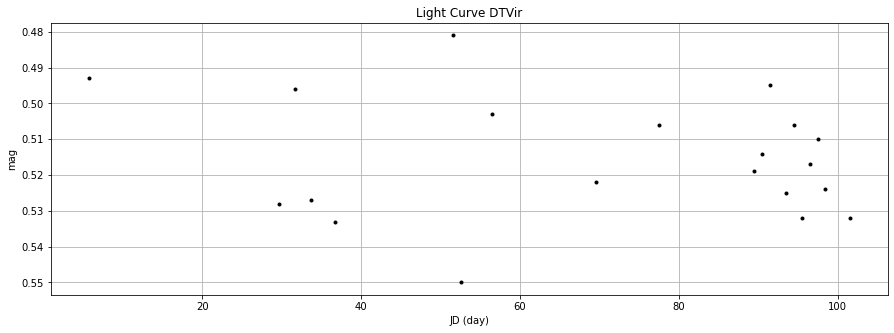

Input first day of the light curve plot (5.682000+)= 0
Input last day of the light curve plot  (max = 101.469000) = 101.469


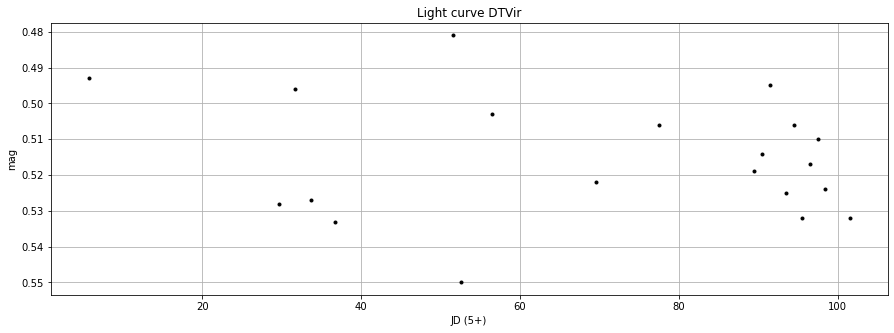

Input maximum frequency  (Nyquist frequency = 0.519211) = 0.519211
Input number of partition (number of data points) = 1000
Input the minimum frequency [resolution in requency] (>0.000519) = 0.000519


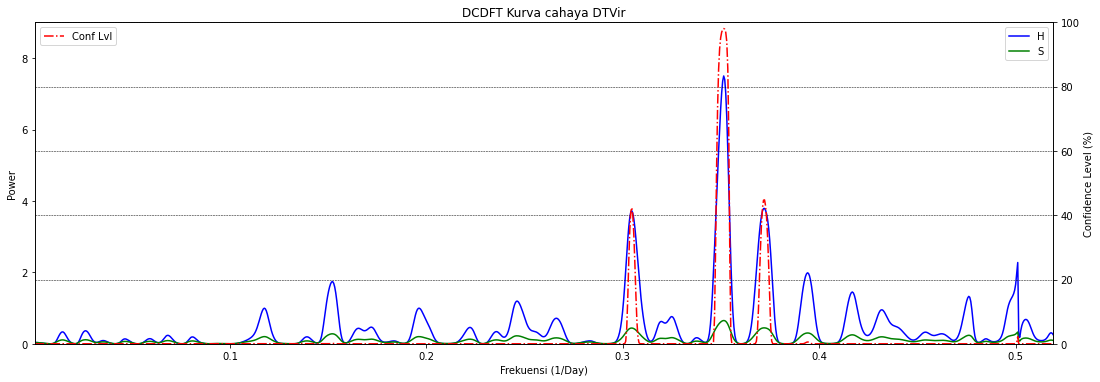

Period = 2.846264 days(s)
Frequency = 0.351338 /day
Confidence Interval = 98.079299%
Use the period to plot the light curve? (y/n) = y


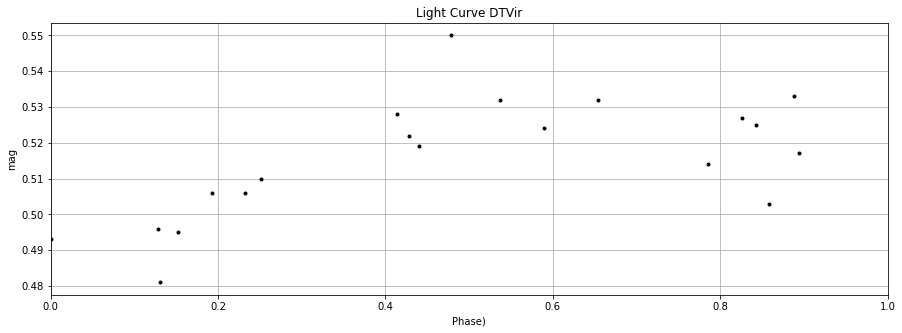

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

###################### Inisiasi ###################
file = 'DTVir.txt'
t = np.loadtxt(file, usecols=0)
m = np.loadtxt(file, usecols=1)

######################## Plot #####################

plt.figure(0,figsize=(15,5))
plt.plot(t, m, 'k.')
plt.xlabel('JD (day)')
plt.gca().invert_yaxis()
plt.ylabel('mag')
plt.title('Light Curve %s'%file)
plt.grid(True)
plt.show()

###################### Inisisasi 2 ###########################
t0 = t[0]
mulai = float(input('Input first day of the light curve plot (%f+)= '%t0))
selesai = float(input('Input last day of the light curve plot  (max = %f) = '%(t[len(t)-1])))
t2 = []
m2 = []
count = 0
N = len(t)
while mulai >= t[count]:
    count +=1
while selesai >= t[count]:
    t2.append(t[count])
    m2.append(m[count])
    count += 1
    if count == N:
        break
t = np.array(t2)
m = np.array(m2)

######################## Plot #####################

plt.figure(0,figsize=(15,5))
plt.plot(t, m, 'k.')
plt.xlabel('JD (%d+)'%t0)
plt.ylabel('mag')
plt.gca().invert_yaxis()
plt.title('Light curve %s'%file)
plt.grid(True)
plt.show()

####################### Perhitungan ##################

mr = np.mean(m)  # Mag rata-rata
f = m - mr       # simpangan dari rerata
Difdate = np.diff(t)  # Mencari selisih antar pengamatan
NP = 2*min(Difdate)  # Periode Nyquist, 2xselisih minimum

if NP == 0:
    fMax = float(input('Input maximum frequency (Nyquist frequency = undefined) = '))
else:
    fN = 1/NP  #1/Day  # Frekuensi Nyquist
    fMax = float(input('Input maximum frequency  (Nyquist frequency = %f) = ' %fN))


Nfreq = int(input('Input number of partition (number of data points) = '))
Df = fMax/Nfreq              #Selang frekuensi
fMin = float(input('Input the minimum frequency [resolution in requency] (>%f) = '%Df))
DT = t[N-1]-t[0]       #Lama observasi
Nfreq = int(fMax//Df)
#                ######## Perhitungan konstanta ##########

omega = np.linspace(fMin, fMax, Nfreq)    #bikin array omega

x = 2*np.pi*omega

a0 = np.sqrt(1/N)

S = np.zeros(Nfreq) 
C2 = []
C1 = []
A1 = []
A2 = []

for i in range(Nfreq):
    cos2x = np.sum(np.cos(x[i]*t)**2) 
    cosx2 = np.sum(np.cos(x[i]*t))**2
    sin2x = np.sum(np.sin(x[i]*t)**2) 
    sinx2 = np.sum(np.sin(x[i]*t))**2
    M = np.sum(np.cos(x[i]*t)*np.sin(x[i]*t)) - a0**2*np.sum(np.sin(x[i]*t))*np.sum(np.cos(x[i]*t))
    
    a1 = np.sqrt(1./(cos2x - a0**2*cosx2))
    a2 = np.sqrt(1./(sin2x - a0**2*sinx2 - a1**2*M**2))
    A1.append(a1)
    A2.append(a2)
    c1 = a1*np.sum(f*np.cos(x[i]*t))
    c2 = a2*np.sum(f*np.sin(x[i]*t)) - a1*a2*c1*M
    C2.append(c2)
    C1.append(c1)
    S[i] = (c1**2+c2**2)/np.sum(f**2)
    
G = -(N-3)/2*np.log(1-S)
H = (N-4)/(N-3)*(G+np.exp(-G)-1)
alpha = 2*(N-3)*DT*fMax/(3*(N-4))
C = 100*(1-np.exp(-H))**alpha
Period = 1/omega[np.argmax(H)]

############## Plot DCDFT ######################

fig, ax1 = plt.subplots(figsize=(15,5))

ax1.plot(omega, H, 'b-', label = 'H')
ax1.plot(omega, S, 'g-', label = 'S')
ax2 = ax1.twinx()
ax2.plot(omega, C, 'r-.', label = 'Conf Lvl')
fig.tight_layout()
ax1.legend(loc='upper right')
ax2.legend(loc='upper left')
ax1.set_xlabel('Frekuensi (1/Day)')
ax1.set_ylabel('Power')
ax2.set_ylabel('Confidence Level (%)')
ax1.set_title('DCDFT Kurva cahaya %s'%file)
ax1.set_xlim(fMin,fMax)
plt.gca().invert_yaxis()
ax2.grid(color='k', linestyle='--', linewidth=.5, which='both', axis='y')
ax2.set_ylim(0,100)
ax1.set_ylim(0,max(H)*1.2)
plt.show()
########### Menentukan fase dan plot kurva cahayanya ##############

print('Period = %f days(s)'%Period)
print('Frequency = %f /day'%omega[np.argmax(H)])

print('Confidence Interval = %f%%' %max(C))
Ya = input('Use the period to plot the light curve? (y/n) = ')
if Ya == 'n':
    Period = float(input('Input the period = '))
fase = (t-t[0])/Period - (t-t[0])//Period

plt.figure(0,figsize=(15,5))
plt.plot(fase, m, 'k.')
plt.ylim(mr+min(f)*1.1,mr+max(f)*1.1)
plt.gca().invert_yaxis()
plt.xlabel('Phase)')
plt.ylabel('mag')
plt.xlim(0,1)
plt.title('Light Curve %s'%file)
plt.grid(True)
plt.show()


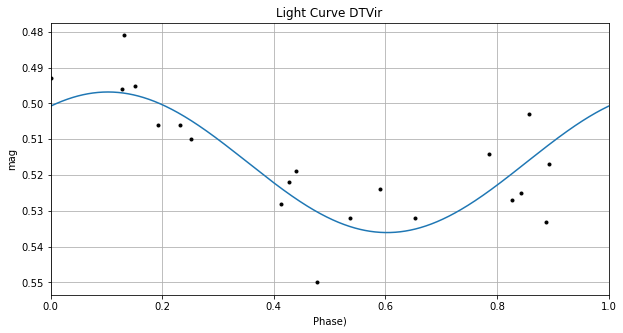

mean =  0.5164279668526047
amplitude =  0.019627767832892613
phase_0 =  0.6471063467976546


In [14]:
def light_curve(phase, mean, amplitude,phase0):
    return amplitude*np.sin(phase*2*np.pi+phase0*2*np.pi)+mean

phase = np.linspace(0,1,1000)
phase0 = 0.65
amplitude = 0.02
mean = 0.51

popt, pcov = curve_fit(light_curve, fase, m, p0=(mean, amplitude, phase0))

magnitude = light_curve(phase, popt[0], popt[1], popt[2])

plt.figure(figsize=(10,5))
plt.plot(phase, magnitude)
plt.plot(fase, m, 'k.')
plt.ylim(mr+min(f)*1.1,mr+max(f)*1.1)
plt.xlabel('Phase)')
plt.ylabel('mag')
plt.xlim(0,1)
plt.title('Light Curve %s'%file)
plt.grid(True)
plt.gca().invert_yaxis()
plt.show()
print('mean = ', popt[0])
print('amplitude = ', popt[1])
print('phase_0 = ', popt[2])

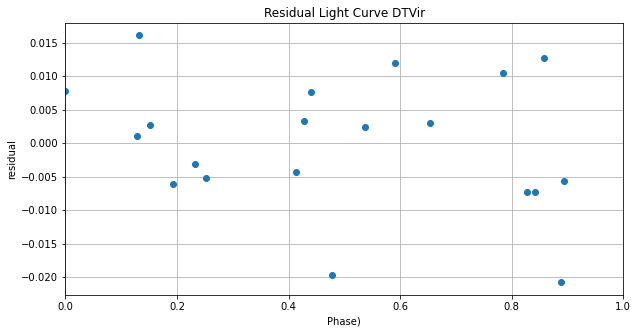

mean_residual = 5.2735593669694933e-17
sigma_residual = 0.009705406368058967


In [28]:
residual = light_curve(fase, popt[0], popt[1], popt[2]) - m

plt.figure(figsize=(10,5))
plt.plot(fase, residual, 'o')
# plt.ylim(mr+min(f)*1.1,mr+max(f)*1.1)
plt.xlabel('Phase)')
plt.ylabel('residual')
plt.xlim(0,1)
plt.title('Residual Light Curve %s'%file)
plt.grid(True)
plt.show()

mean_residual = np.mean(residual)
sigma_residual = np.std(residual)
print('mean_residual =', mean_residual)
print('sigma_residual =', sigma_residual)